In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 유가(일반경유) 일별 통계 -> 순별 평균가

In [3]:
df_oil_daily = pd.read_csv('C:\\Users\\acorn\\Desktop\\주유소_평균판매가격_제품별_2014_2024.csv', encoding = 'ms949')
df_oil_daily

,구분,고급휘발유,보통휘발유,자동차용경유,실내등유,보일러등유
0,2014년01월01일,2202.27,1887.37,1705.85,1353.81,NaN
1,2014년01월02일,2201.07,1887.56,1706.27,1353.99,NaN
2,2014년01월03일,2200.04,1888.51,1707.15,1354.22,NaN
3,2014년01월04일,2199.92,1888.98,1707.61,1354.30,NaN
4,2014년01월05일,2199.00,1889.11,1707.56,1354.54,NaN
...,...,...,...,...,...,...
3962,2024년11월06일,1883.85,1615.96,1444.48,1307.99,NaN
3963,2024년11월07일,1884.81,1618.77,1447.57,1308.19,NaN
3964,2024년11월08일,1887.30,1621.59,1450.91,1308.40,NaN
3965,2024년11월09일,1885.58,1624.42,1454.17,1309.63,NaN


In [4]:
df_diesel_daily = df_oil_daily[['구분', '자동차용경유']]
df_diesel_daily['date'] = pd.to_datetime(df_diesel_daily['구분'], format='%Y년%m월%d일')

C:\Users\acorn\AppData\Local\Temp\ipykernel_18684\762464942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diesel_daily['date'] = pd.to_datetime(df_diesel_daily['구분'], format='%Y년%m월%d일')


In [5]:
# 날짜 -> 순 변환 함수
def categorize_day(date):
    day = date.day
    if day <= 10:
        return '초순'
    elif day <= 20:
        return '중순'
    else:
        return '하순'

In [6]:
df_diesel_daily

,구분,자동차용경유,date
0,2014년01월01일,1705.85,2014-01-01
1,2014년01월02일,1706.27,2014-01-02
2,2014년01월03일,1707.15,2014-01-03
3,2014년01월04일,1707.61,2014-01-04
4,2014년01월05일,1707.56,2014-01-05
...,...,...,...
3962,2024년11월06일,1444.48,2024-11-06
3963,2024년11월07일,1447.57,2024-11-07
3964,2024년11월08일,1450.91,2024-11-08
3965,2024년11월09일,1454.17,2024-11-09


In [9]:
df_diesel_daily['year'] = df_diesel_daily['date'].dt.year
df_diesel_daily['month'] = df_diesel_daily['date'].dt.month
df_diesel_daily['date range'] = df_diesel_daily['date'].apply(categorize_day)
df_diesel_daily

C:\Users\acorn\AppData\Local\Temp\ipykernel_18684\1801101063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diesel_daily['year'] = df_diesel_daily['date'].dt.year
C:\Users\acorn\AppData\Local\Temp\ipykernel_18684\1801101063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diesel_daily['month'] = df_diesel_daily['date'].dt.month


,구분,자동차용경유,date,year,month,date range
0,2014년01월01일,1705.85,2014-01-01,2014,1,초순
1,2014년01월02일,1706.27,2014-01-02,2014,1,초순
2,2014년01월03일,1707.15,2014-01-03,2014,1,초순
3,2014년01월04일,1707.61,2014-01-04,2014,1,초순
4,2014년01월05일,1707.56,2014-01-05,2014,1,초순
...,...,...,...,...,...,...
3962,2024년11월06일,1444.48,2024-11-06,2024,11,초순
3963,2024년11월07일,1447.57,2024-11-07,2024,11,초순
3964,2024년11월08일,1450.91,2024-11-08,2024,11,초순
3965,2024년11월09일,1454.17,2024-11-09,2024,11,초순


In [23]:
# 혹시 몰라서 순별로 전환하기 전 일별 경유가 저장
df_diesel_daily.to_pickle("일반경유_일별_피처링.pkl")
# pd.read_pickle("일반경유_일별_피처링.pkl")로 불러오면 됨

# 최종 형태

In [21]:
df_diesel_soonly = df_diesel_daily.groupby(['year', 'month', 'date range'])['자동차용경유'].mean().reset_index()
df_diesel_soonly['자동차용경유'] = df_diesel_soonly['자동차용경유'].round(1)

In [22]:
df_diesel_soonly

,year,month,date range,자동차용경유
0,2014,1,중순,1706.0
1,2014,1,초순,1707.3
2,2014,1,하순,1702.4
3,2014,2,중순,1697.9
4,2014,2,초순,1700.1
...,...,...,...,...
386,2024,9,하순,1431.7
387,2024,10,중순,1421.1
388,2024,10,초순,1416.9
389,2024,10,하순,1425.9


## 최종 파일

In [24]:
df_diesel_soonly.to_pickle("일반경유_순별_평균가.pkl")
# pd.read_pickle("일반경유_일별_피처링.pkl")로 불러오면 됨

In [ ]:
# 시각화로 데이터 보기

In [14]:
import seaborn as sns

<Axes: >

C:\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  func(*args, **kwargs)
C:\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  func(*args, **kwargs)
C:\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  func(*args, **kwargs)
C:\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  func(*args, **kwargs)
C:\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  func(*args, **kwargs)
C:\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  func(*args, **kwargs)
C:\anaconda3\Lib\site-packages\IPython

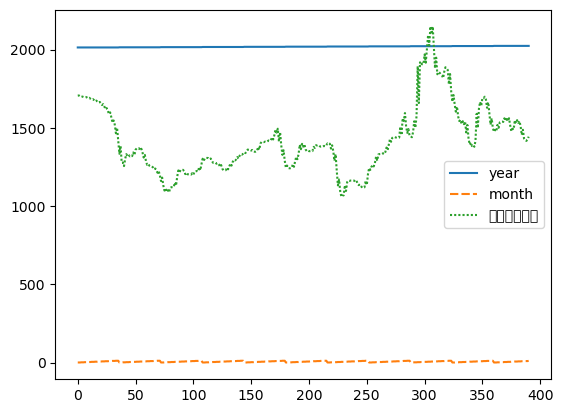

In [15]:
sns.lineplot(data=df_diesel_soon)

<Axes: >

C:\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  func(*args, **kwargs)
C:\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  func(*args, **kwargs)
C:\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  func(*args, **kwargs)
C:\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  func(*args, **kwargs)
C:\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  func(*args, **kwargs)
C:\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  func(*args, **kwargs)
C:\anaconda3\Lib\site-packages\IPython

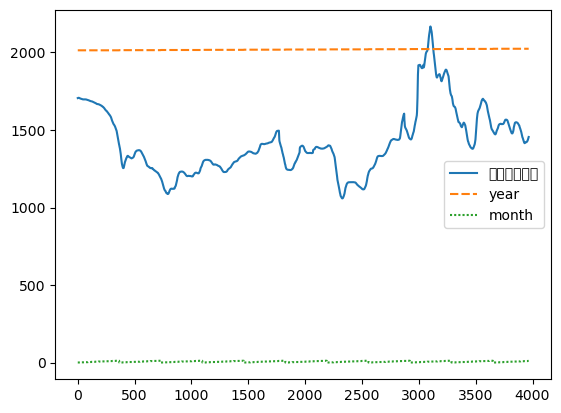

In [18]:
sns.lineplot(data=df_diesel_daily)